# Como investimentos influenciam o ganho de medalhas em olimpíadas<img src="https://upload.wikimedia.org/wikipedia/commons/a/a7/Olympic_flag.svg" width="324" height="324" align="right">
## Membros:
- Ana Beatriz Oliveira de Macedo
- Abdul Malik 
- Bruna Bellini Faria
- Heloisa Mariani
- Marina Lara

**Matéria**: 
Storytelling

In [2]:
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [7]:
#Web Scraping de desempenho do Brasil em todas as olímpiadas
url = 'https://pt.wikipedia.org/wiki/Lista_de_medalhas_brasileiras_nos_Jogos_Ol%C3%ADmpicos'
req = requests.get(url)
print(req.status_code)

200


In [8]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_medalhas_brasileiras_nos_Jogos_Ol%C3%ADmpicos'
dfs = pd.read_html(url)
df = dfs[0]
print(df)

     Ano           Local  Ouro  Prata  Bronze  Total Colocação
0   2020          Tóquio   7.0    6.0     8.0   21.0       12º
1   2016  Rio de Janeiro   7.0    6.0     6.0   19.0       13º
2   2012         Londres   3.0    5.0     9.0   17.0       22º
3   2008          Pequim   3.0    4.0    10.0   17.0       22º
4   2004          Atenas   5.0    2.0     3.0   10.0       16º
..   ...             ...   ...    ...     ...    ...       ...
24  1912       Estocolmo   NaN    NaN     NaN    NaN        np
25  1908         Londres   NaN    NaN     NaN    NaN        np
26  1904       St. Louis   NaN    NaN     NaN    NaN        np
27  1900           Paris   NaN    NaN     NaN    NaN        np
28  1896          Atenas   NaN    NaN     NaN    NaN        np

[29 rows x 7 columns]


In [26]:
df= pd.read_csv('./Data/Brasil-Medalhas.csv')
# df.to_csv('./Data/Brasil-Medalhas.csv', index=False)

In [27]:
df.drop([19, 20, 21, 22, 24, 25, 26, 27, 28], axis=0, inplace=True)

In [28]:
df.fillna('0', inplace=True)

In [29]:
df['Ouro'] = df['Ouro'].astype(int)
df['Prata'] = df['Prata'].astype(int)
df['Bronze'] = df['Bronze'].astype(int)
df

,Ano,Local,Ouro,Prata,Bronze,Total,Colocação
0,2020,Tóquio2,7,6,8,21.0,12º
1,2016,Rio de Janeiro,7,6,6,19.0,13º
2,2012,Londres2,3,5,9,17.0,22º
3,2008,Pequim,3,4,10,17.0,22º
4,2004,Atenas,5,2,3,10.0,16º
5,2000,Sydney,0,6,6,12.0,52º
6,1996,Atlanta,3,3,9,15.0,25º
7,1992,Barcelona,2,1,0,3.0,25º
8,1988,Seul,1,2,3,6.0,24º
9,1984,Los Angeles,1,5,2,8.0,19º


In [30]:
df.insert(7, 'Atletas',[302,465,259,277,247,205,225,197,170,151,109,93,89,84,68,81,48,108,81,21])
df.insert(8, 'Homens',[162,256,136,144,125,111,159,146,135,129,94,86,84,81,67,80,47,103,70,21])
df.insert(9, 'Mulheres',[140,209,123,133,122,94,66,51,35,22,15,7,5,3,1,1,1,5,11,0])

In [32]:
df = df.rename_axis('index').reset_index()
df = df.drop(['index'], axis=1)
df

,Ano,Local,Ouro,Prata,Bronze,Total,Colocação,Atletas,Homens,Mulheres
0,2020,Tóquio2,7,6,8,21.0,12º,302,162,140
1,2016,Rio de Janeiro,7,6,6,19.0,13º,465,256,209
2,2012,Londres2,3,5,9,17.0,22º,259,136,123
3,2008,Pequim,3,4,10,17.0,22º,277,144,133
4,2004,Atenas,5,2,3,10.0,16º,247,125,122
5,2000,Sydney,0,6,6,12.0,52º,205,111,94
6,1996,Atlanta,3,3,9,15.0,25º,225,159,66
7,1992,Barcelona,2,1,0,3.0,25º,197,146,51
8,1988,Seul,1,2,3,6.0,24º,170,135,35
9,1984,Los Angeles,1,5,2,8.0,19º,151,129,22


In [52]:
medals_bra = px.scatter(df, x='Ano', y='Total', title='Evolução de medalhas brasileiras nas olimpíadas', color='Total')
medals_bra.show()

In [53]:
Atletas= go.Scatter(x=df['Ano'], y=df['Atletas'],
                    mode='lines+markers',
                    name='Número de atletas', line = dict(color='green', width=2))
Homens= go.Scatter(x=df['Ano'], y=df['Homens'],
                    mode='lines+markers',
                    name='Homens', line = dict(color='blue', width=2))
Mulheres= go.Scatter(x=df['Ano'], y=df['Mulheres'],
                    mode='lines+markers',
                    name='Mulheres', line = dict(color='pink', width=2))
data= [Atletas, Homens, Mulheres]
layout= go.Layout(title={
                    'text' : 'Evolução de participantes brasileiros em olimpíadas',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Quantidade de atletas'},
                   xaxis={'title': 'Ano', 'tickangle' : 45},
                   legend_title="Legenda:",
                    height=500, width=900)
fig = go.Figure(data= data, layout=layout)
fig.show()

<AxesSubplot:title={'center':'Tipos de medalhas por edição'}, ylabel='Edição'>

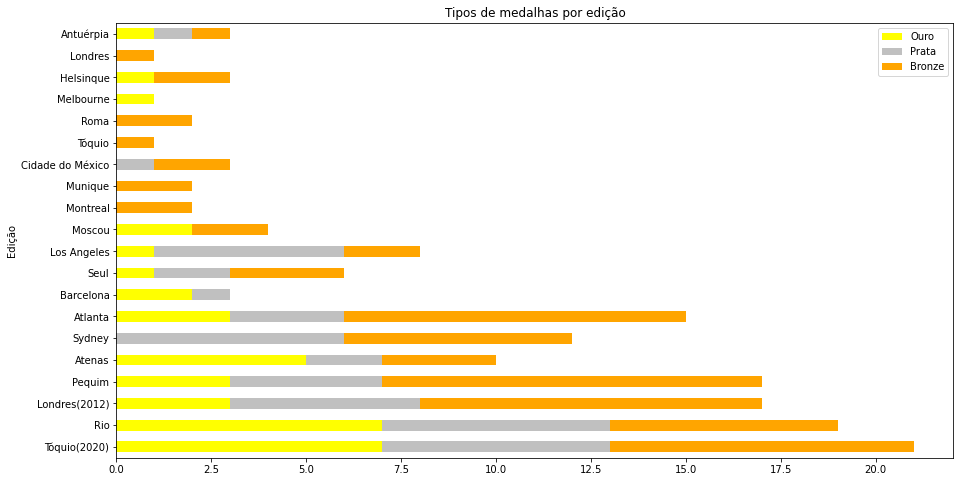

In [17]:
df2 = pd.DataFrame([['Tóquio(2020)', 7,6,8], ['Rio', 7,6,6], ['Londres(2012)', 3,5,9],
                   ['Pequim', 3,4,10], ['Atenas',5,2,3],['Sydney', 0,6,6], ['Atlanta', 3,3,9], ['Barcelona', 2,1,0],
                   ['Seul',1,2,3], ['Los Angeles',1,5,2],['Moscou',2,0,2],['Montreal',0,0,2],['Munique',0,0,2],
                   ['Cidade do México',0,1,2],['Tóquio',0,0,1],['Roma',0,0,2],['Melbourne',1,0,0],['Helsinque',1,0,2],
                   ['Londres',0,0,1],['Antuérpia',1,1,1]],columns=['Edição', 'Ouro', 'Prata', 'Bronze'])

df2.plot(x='Edição', kind='barh', stacked=True,title='Tipos de medalhas por edição', figsize=(15,8),
        color={"Ouro": "yellow", "Prata": "silver", 'Bronze':'orange'})

In [25]:
last4 = pd.DataFrame([['Tóquio2', 329,121.3,35], ['Rio de Janeiro', 700,258,40],
                      ['Londres2', 677.2,250.4,32],['Pequim', 615.4,297.2,32],['Atenas', 0,0,0],['Sydney', 0,0,0],['Atlanta', 0,0,0],['Barcelona', 0,0,0], ['Seul',0,0,0],['Los Angeles', 0,0,0],['Moscou', 0,0,0],['Montreal', 0,0,0],['Munique', 0,0,0],['Cidade do México', 0,0,0],['Tóquio', 0,0,0],['Roma', 0,0,0],['Melbourne', 0,0,0],['Helsinque', 0,0,0],['Londres', 0,0,0],['Antuérpia', 0,0,0]],
                     columns=['Local','Valor recebido pelo COB','Repassado as confederações','Modalidades'])
last4

,Local,Valor recebido pelo COB,Repassado as confederações,Modalidades
0,Tóquio2,329.0,121.3,35
1,Rio de Janeiro,700.0,258.0,40
2,Londres2,677.2,250.4,32
3,Pequim,615.4,297.2,32
4,Atenas,0.0,0.0,0
5,Sydney,0.0,0.0,0
6,Atlanta,0.0,0.0,0
7,Barcelona,0.0,0.0,0
8,Seul,0.0,0.0,0
9,Los Angeles,0.0,0.0,0


<AxesSubplot:title={'center':'Volume de recursos repassados pelas estatais para Confederações no periodo de 2009-2012 em milhões de reais'}, xlabel='Estatais'>

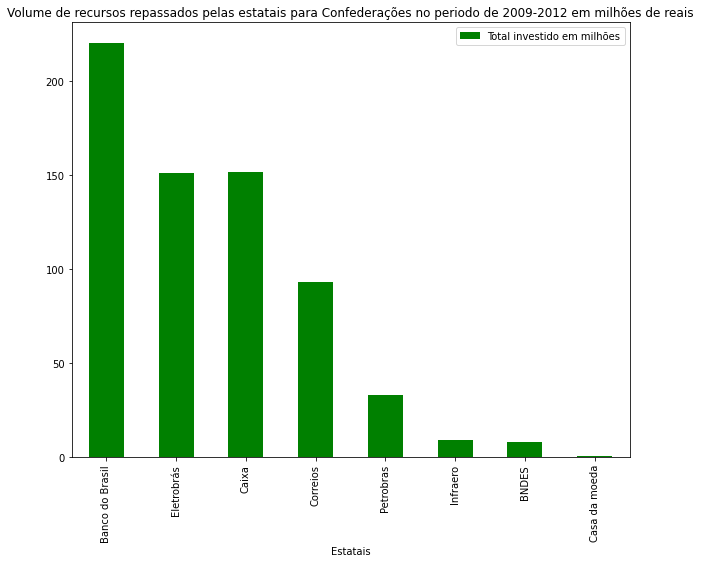

In [54]:
#Investimentos
empresa_estatal_2012 = pd.DataFrame([['Banco do Brasil', 220.1], ['Eletrobrás', 151.1], ['Caixa', 151.4],
                   ['Correios', 93.1], ['Petrobras',33.1],['Infraero', 9.1], ['BNDES', 8.1], ['Casa da moeda', 0.5]],columns=['Estatais', 'Total investido em milhões'])

empresa_estatal_2012.plot(x='Estatais', kind='bar',title='Volume de recursos repassados pelas estatais para Confederações no periodo de 2009-2012 em milhões de reais', figsize=(10,8),
        color={ 'Total investido em milhões': "green"})

In [20]:
#Web scraping de medalhas ganhas por estado brasileiro
url2 = 'https://pt.wikipedia.org/wiki/Lista_de_medalhas_brasileiras_nos_Jogos_Ol%C3%ADmpicos'
df_estado = pd.read_html(url2)
df2 = df_estado[22]
print(df2)

                Estado  Unnamed: 1  Unnamed: 2  Unnamed: 3 Unnamed: 4
0            São Paulo          45          67          92        204
1       Rio de Janeiro          27          30          36     93[14]
2         Minas Gerais          14          13           9     36[15]
3    Rio Grande do Sul          11          21          14     46[16]
4               Paraná           8          19          10         37
..                 ...         ...         ...         ...        ...
18            Maranhão           0           3           1          4
19               Ceará           0           3           0      3[31]
20  Mato Grosso do Sul           0           1           3      4[32]
21            Amazonas           0           1           1      2[33]
22             Sergipe           0           0           1      1[34]

[23 rows x 5 columns]


In [21]:
#Número de atletas que conquistou uma medalha olímpica, seja em competições individuais ou em equipe por estado.
df2_index = pd.DataFrame(df2.values, columns=['Estado', 'Gold', 'Silver', 'Bronze', 'Total'])
# df2_index.to_csv('./Data/medal_state_BRA.csv')

In [55]:
by_state= pd.read_csv('./Data/medal_state_BRA.csv')
by_state.drop('Unnamed: 0',axis=1, inplace=True)
by_state['Total'] = by_state['Total'].astype(str).str.replace("]", "").str.replace("[", "").astype(int)
by_state

<ipython-input-55-e557e1df1d46>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



,Unnamed: 0,Estado,Gold,Silver,Bronze,Total
0,0,São Paulo,45,67,92,204
1,1,Rio de Janeiro,27,30,36,9314
2,2,Minas Gerais,14,13,9,3615
3,3,Rio Grande do Sul,11,21,14,4616
4,4,Paraná,8,19,10,37
...,...,...,...,...,...,...
18,18,Maranhão,0,3,1,4
19,19,Ceará,0,3,0,331
20,20,Mato Grosso do Sul,0,1,3,432
21,21,Amazonas,0,1,1,233


In [23]:
medals_state_bra = px.bar(by_state, x='Total', y='Estado', title='Total de medalhas por estado brasileiro em olimpíadas', color='Estado', orientation='h')
medals_state_bra.show()

In [39]:
#Análise do quadro de medalhas de Tóquio 2020
tokyo_2020 = pd.read_csv('./Data/tokyo2020.csv')
tokyo_2020

,Rank,Country,Gold,Silver,Bronze,Total,Rank by total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,RUS
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


In [25]:
import plotly.express as px
medals = px.bar(tokyo_2020[:14], x='NOCCode', y='Total', title='Total de medalhas por país em Tóquio', color='NOCCode')
medals.show()

Text(0, 0.5, 'Rank')

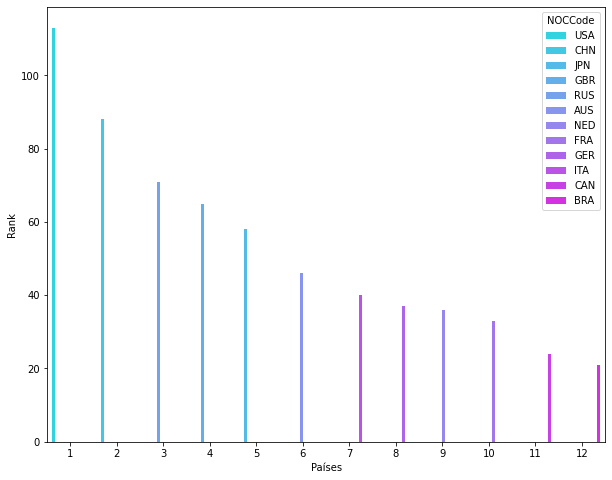

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Rank by total', y='Total', hue='NOCCode', palette='cool', data=tokyo_2020.head(12))
plt.xlabel('Países')
plt.ylabel('Rank')

In [27]:
#Todas as olimpíadas até Rio 2016
ate_rio2016 = pd.read_csv('./Data/athlete_events.csv')
ate_rio2016.fillna('0', inplace=True)
ate_rio2016.drop(['Games', 'ID'], axis=1,inplace=True)
ate_rio2016.drop(ate_rio2016.loc[ate_rio2016['Season']=='Winter'].index, inplace=True)
ate_rio2016 = ate_rio2016.rename_axis('index').reset_index()
ate_rio2016 = ate_rio2016.drop(['index'], axis=1)

ate_rio2016

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24.0,0,0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,Edgar Lindenau Aabye,M,34.0,0,0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,0,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004,Summer,Athina,Hockey,Hockey Men's Hockey,0
222548,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972,Summer,Munich,Football,Football Men's Football,0
222549,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,0
222550,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,0


In [28]:
ate_rio2016['Medal'].value_counts()

0         188464
Gold       11459
Bronze     11409
Silver     11220
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'25 países com mais atletas em olimpíadas'}>

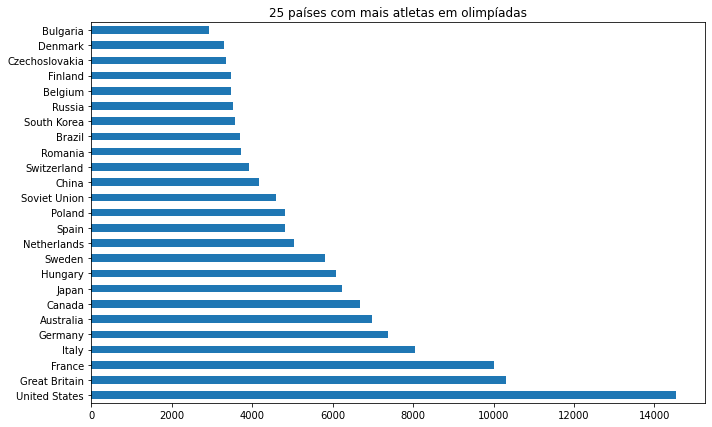

In [29]:
ate_rio2016['Team'].value_counts().head(25).plot(kind='barh', figsize=(11,7), title='25 países com mais atletas em olimpíadas')

In [30]:
ate_rio2016["Age"] = pd.to_numeric(ate_rio2016["Age"], downcast="float")
ate_rio2016['Age'].mean()

24.61399

<AxesSubplot:ylabel='Density'>

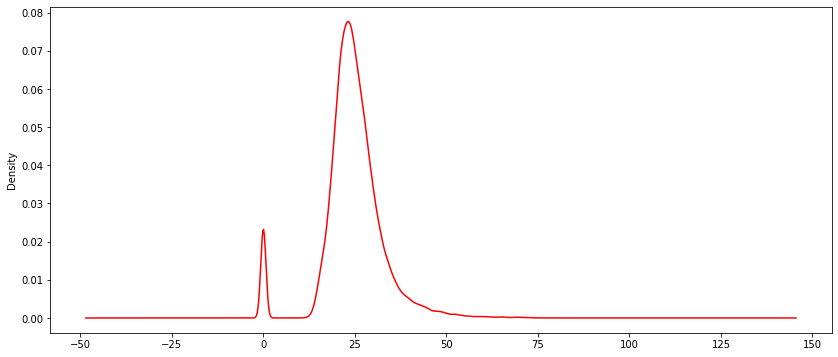

In [31]:
ate_rio2016['Age'].plot(kind='density', figsize=(14,6), color='red')

<AxesSubplot:title={'center':'Número de homens e mulheres em olimpíadas'}, ylabel='Sex'>

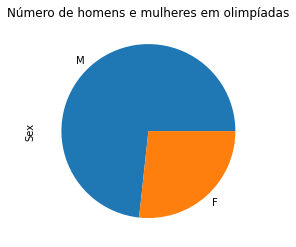

In [32]:
ate_rio2016['Sex'].value_counts().plot(kind='pie', title='Número de homens e mulheres em olimpíadas')

In [40]:
medals_percapta=pd.read_csv('./Data/medals_percapta.csv', sep=';')
# medals_percapta= medals_percapta[['Rank_medal', 'NOCCode', 'Country', 'Medals', 'Population', 'Population per Medal']]
medals_percapta

,Rank,Country,Medals,Population,Population per Medal,NOCCode
0,1,Liechtenstein,10,36476,3647,LIE
1,2,Norway,521,5005700,9607,NOR
2,3,Finland,470,5407040,11504,FIN
3,4,Sweden,652,9490683,14556,SWE
4,5,Hungary,498,9962000,20004,HUN
...,...,...,...,...,...,...
137,138,Tanzania,2,43188000,21594000,TAN
138,139,Vietnam,4,87840000,21960000,VIE
139,140,Sudan,1,30894000,30894000,SSD
140,141,Iraq,1,33330000,33330000,IRQ


In [42]:
juntos = tokyo_2020.merge(medals_percapta, left_on='NOCCode', right_on='NOCCode')
juntos = juntos.rename(columns={'Rank by total':'Ranking medalhas Tokyo', 'Rank_y':'Ranking pop por medalha', 'Gold':'Ouro Tokyo','Silver':'Prata Tokyo', 'Bronze':'Bronze Tokyo', 'Total':'Total medalhas Tokyo', 'Population per Medal':'População por medalhas', 'Medals':'Total medalhas', 'Population':'População', 'Country_y':'Países'})
juntos.drop('Rank_x',axis=1, inplace=True)
juntos= juntos[['NOCCode', 'Países','População', 'Ouro Tokyo','Prata Tokyo','Bronze Tokyo','Total medalhas Tokyo','Ranking medalhas Tokyo','Total medalhas', 'População por medalhas', 'Ranking pop por medalha']]
juntos

,NOCCode,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Total medalhas,População por medalhas,Ranking pop por medalha
0,USA,United States,313382000,39,41,33,113,1,2827,110853,39
1,CHN,China,1347350000,38,32,18,88,2,605,2227024,107
2,JPN,Japan,127650000,27,14,17,58,5,497,256841,54
3,GBR,Great Britain,62262000,22,21,22,65,4,876,71075,24
4,RUS,Russian Federation,143056383,20,28,23,71,3,586,244123,53
...,...,...,...,...,...,...,...,...,...,...,...
88,GHA,Ghana,24223431,0,0,1,1,77,4,6055857,118
89,GRN,Grenada,110821,0,0,1,1,77,2,5541,19
90,KUW,Kuwait,3582054,0,0,1,1,77,4,895513,82
91,MDA,Moldova,3559500,0,0,1,1,77,8,444937,68


In [43]:
idh_colocacao =pd.read_csv('./Data/idh_com_colocacao.csv', sep=',')
idh_colocacao

,País,Colocação,Ouro,Prata,Bronze,Total,Ranking IDH Global,IDH,NOCCode
0,Estados Unidos,1,46,37,38,121,8,0.915,USA
1,China,2,26,18,26,70,90,0.727,CHN
2,Reino Unido,3,27,23,17,67,14,0.907,GBR
3,Federação Russa,4,19,17,20,56,50,0.798,RUS
4,França,5,10,18,14,42,22,0.888,FRA
...,...,...,...,...,...,...,...,...,...
75,Burundi,79,0,1,0,1,184,0.400,BDI
76,Jordânia,80,1,0,0,1,80,0.748,JOR
77,Singapura,81,1,0,0,1,11,0.912,SGP
78,Fiji,82,1,0,0,1,90,0.727,FIJ


In [44]:
juntos_2= idh_colocacao.merge(juntos, left_on='NOCCode', right_on='NOCCode')
juntos_2 = juntos_2.rename(columns={'Colocação':'Ranking total olimpíadas', 'Ranking IDH Global':'Ranking IDH global 2014', 'Ouro':'Ouro Rio', 'Prata':'Prata Rio', 'Bronze':'Bronze Rio', 'Total':'Total medalhas Rio'})
juntos_2.drop('País',axis=1, inplace=True)
juntos_2= juntos_2[['NOCCode', 'Países','População', 'Ouro Tokyo','Prata Tokyo','Bronze Tokyo','Total medalhas Tokyo','Ranking medalhas Tokyo', 'Ouro Rio', 'Prata Rio','Bronze Rio','Total medalhas Rio', 'Ranking IDH global 2014', 'IDH','Total medalhas', 'Ranking total olimpíadas','População por medalhas', 'Ranking pop por medalha']]
juntos_2

,NOCCode,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha
0,USA,United States,313382000,39,41,33,113,1,46,37,38,121,8,0.915,2827,1,110853,39
1,CHN,China,1347350000,38,32,18,88,2,26,18,26,70,90,0.727,605,2,2227024,107
2,GBR,Great Britain,62262000,22,21,22,65,4,27,23,17,67,14,0.907,876,3,71075,24
3,RUS,Russian Federation,143056383,20,28,23,71,3,19,17,20,56,50,0.798,586,4,244123,53
4,FRA,France,65350000,10,12,11,33,10,10,18,14,42,22,0.888,836,5,78169,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GRN,Grenada,110821,0,0,1,1,77,0,1,0,1,79,0.750,2,76,5541,19
72,QAT,Qatar,1699435,2,0,1,3,60,0,1,0,1,32,0.850,5,77,339887,62
73,PHI,Philippines,92337852,1,2,1,4,47,0,1,0,1,115,0.668,10,78,9233785,131
74,JOR,Jordan,6289800,0,1,1,2,66,1,0,0,1,80,0.748,1,80,6289800,120


In [40]:
juntos_brasil = df.merge(last4, left_on='Local', right_on='Local')
juntos_brasil['Colocação'] = juntos_brasil['Colocação'].astype(str).str.replace("°", "").str.replace("º", "").astype(int)
juntos_brasil['Bolsa atleta'] = [242,358,114,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  # o programa bolsa atleta teve início em 2005
juntos_brasil

ValueError: invalid literal for int() with base 10: '12º'